In [33]:
# !kaggle competitions download -c dogs-vs-cats --force

In [64]:
import os
import shutil
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt

In [35]:
# shutil.move('./dogs-vs-cats.zip', './data/dogs-vs-cats.zip')

In [36]:
# Unzip data set
# local_zip = './data/dogs-vs-cats.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./data/dogs-vs-cats')

# zip_ref.close()

In [37]:
# os.remove('./data/dogs-vs-cats.zip')

In [38]:
#Unzipping training data
# local_zip = './data/dogs-vs-cats/train.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./data/dogs-vs-cats/')

#Unzipping test data
# local_zip = './data/dogs-vs-cats/test1.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./data/dogs-vs-cats/')


In [39]:
# os.remove('./data/dogs-vs-cats/train.zip')
# os.remove('./data/dogs-vs-cats/test1.zip')

In [40]:
train_dir = './data/dogs-vs-cats/train/'
test_dir = './data/dogs-vs-cats/test1'
train = os.listdir(train_dir)
test = os.listdir(test_dir)

In [41]:
!mkdir data\dogs-vs-cats\train\cats
!mkdir data\dogs-vs-cats\train\dogs
!mkdir data\dogs-vs-cats\test1\dogs
!mkdir data\dogs-vs-cats\test1\cats

A subdirectory or file data\dogs-vs-cats\train\cats already exists.
A subdirectory or file data\dogs-vs-cats\train\dogs already exists.
A subdirectory or file data\dogs-vs-cats\test1\dogs already exists.
A subdirectory or file data\dogs-vs-cats\test1\cats already exists.


In [42]:
for i in train:
    if 'cat' in i:
        # shutil.move(train_dir+i, './data/dogs-vs-cats/train/cats/'+i)
        pass
    elif 'dog' in i:
        # shutil.move(train_dir+i, './data/dogs-vs-cats/train/dogs/'+i)
        pass

In [43]:
!mkdir data\dogs-vs-cats\train\train
!mkdir data\dogs-vs-cats\train\test
!mkdir data\dogs-vs-cats\train\train\cats
!mkdir data\dogs-vs-cats\train\train\dogs
!mkdir data\dogs-vs-cats\train\test\cats
!mkdir data\dogs-vs-cats\train\test\dogs

A subdirectory or file data\dogs-vs-cats\train\train already exists.
A subdirectory or file data\dogs-vs-cats\train\test already exists.
A subdirectory or file data\dogs-vs-cats\train\train\cats already exists.
A subdirectory or file data\dogs-vs-cats\train\train\dogs already exists.
A subdirectory or file data\dogs-vs-cats\train\test\cats already exists.
A subdirectory or file data\dogs-vs-cats\train\test\dogs already exists.


In [44]:
#for train
#for dogs
train_dogs = os.listdir('./data/dogs-vs-cats/train/dogs')
for i in train_dogs[2500:]:
    shutil.move('./data/dogs-vs-cats/train/dogs/'+i, './data/dogs-vs-cats/train/train/dogs/'+i)

#for cats
train_cats = os.listdir('./data/dogs-vs-cats/train/cats')
for i in train_cats[2500:]:
    shutil.move('./data/dogs-vs-cats/train/cats/'+i, './data/dogs-vs-cats/train/train/cats/'+i)


#for test
#for dogs
for i in train_dogs[:2500]:
    shutil.move('./data/dogs-vs-cats/train/dogs/'+i, './data/dogs-vs-cats/train/test/dogs/'+i)

#for cats
for i in train_cats[:2500]:
    shutil.move('./data/dogs-vs-cats/train/cats/'+i, './data/dogs-vs-cats/train/test/cats/'+i)


In [45]:
trainGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 50,
    width_shift_range = 2.0,
    height_shift_range = 2.0,    
    shear_range = 0.4,
    zoom_range = 2.0,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [46]:
train_dir = './data/dogs-vs-cats/train/train'
test_dir = './data/dogs-vs-cats/train/test'

train = trainGenerator.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

val = trainGenerator.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [49]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [51]:
history = model.fit(
      train,
      steps_per_epoch=100,  # 20000 images = batch_size * steps
      epochs=100,
      validation_data=val,
      validation_steps=50  # 5000 images = batch_size * steps
)

Epoch 1/100
100/100 [==============================] - 49s 492ms/step - loss: 0.6939 - accuracy: 0.5050 - val_loss: 0.6915 - val_accuracy: 0.5190
Epoch 2/100
100/100 [==============================] - 50s 504ms/step - loss: 0.6925 - accuracy: 0.5290 - val_loss: 0.6851 - val_accuracy: 0.5610
Epoch 3/100
100/100 [==============================] - 50s 495ms/step - loss: 0.6926 - accuracy: 0.5300 - val_loss: 0.6877 - val_accuracy: 0.5440
Epoch 4/100
100/100 [==============================] - 49s 490ms/step - loss: 0.6923 - accuracy: 0.5225 - val_loss: 0.6881 - val_accuracy: 0.5530
Epoch 5/100
100/100 [==============================] - 49s 488ms/step - loss: 0.6913 - accuracy: 0.5500 - val_loss: 0.6886 - val_accuracy: 0.5510
Epoch 6/100
100/100 [==============================] - 48s 482ms/step - loss: 0.6867 - accuracy: 0.5405 - val_loss: 0.6810 - val_accuracy: 0.5670
Epoch 7/100
100/100 [==============================] - 47s 472ms/step - loss: 0.6884 - accuracy: 0.5455 - val_loss: 0.6840 -

In [52]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))



model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)



history = model.fit(
      train,
      steps_per_epoch=100, 
      epochs=100,
      validation_data=val,
      validation_steps=50  
)

Epoch 1/100
100/100 [==============================] - 44s 430ms/step - loss: 0.7376 - accuracy: 0.5110 - val_loss: 0.7534 - val_accuracy: 0.5180
Epoch 2/100
100/100 [==============================] - 40s 399ms/step - loss: 0.6972 - accuracy: 0.5415 - val_loss: 0.6638 - val_accuracy: 0.5880
Epoch 3/100
100/100 [==============================] - 41s 415ms/step - loss: 0.6835 - accuracy: 0.5730 - val_loss: 0.6606 - val_accuracy: 0.5360
Epoch 4/100
100/100 [==============================] - 40s 401ms/step - loss: 0.6699 - accuracy: 0.5745 - val_loss: 0.6523 - val_accuracy: 0.5970
Epoch 5/100
100/100 [==============================] - 40s 403ms/step - loss: 0.6667 - accuracy: 0.5960 - val_loss: 0.7111 - val_accuracy: 0.5990
Epoch 6/100
100/100 [==============================] - 40s 398ms/step - loss: 0.6597 - accuracy: 0.6005 - val_loss: 0.6572 - val_accuracy: 0.5980
Epoch 7/100
100/100 [==============================] - 40s 400ms/step - loss: 0.6675 - accuracy: 0.6100 - val_loss: 0.6235 -

In [63]:
trainAccuracy = history.history['accuracy']
valAccuracy = history.history['val_accuracy']

Text(0, 0.5, 'Accuracy')

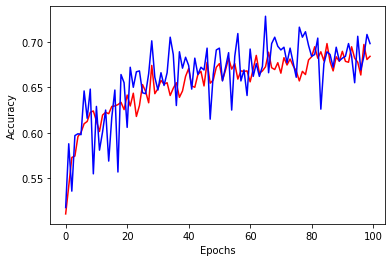

In [68]:
plt.plot(trainAccuracy, label = 'Training Accuracy', color = 'red')
plt.plot(valAccuracy, label = 'Validation Accuracy', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')